In [11]:
# import Libraries
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [13]:
# perform normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

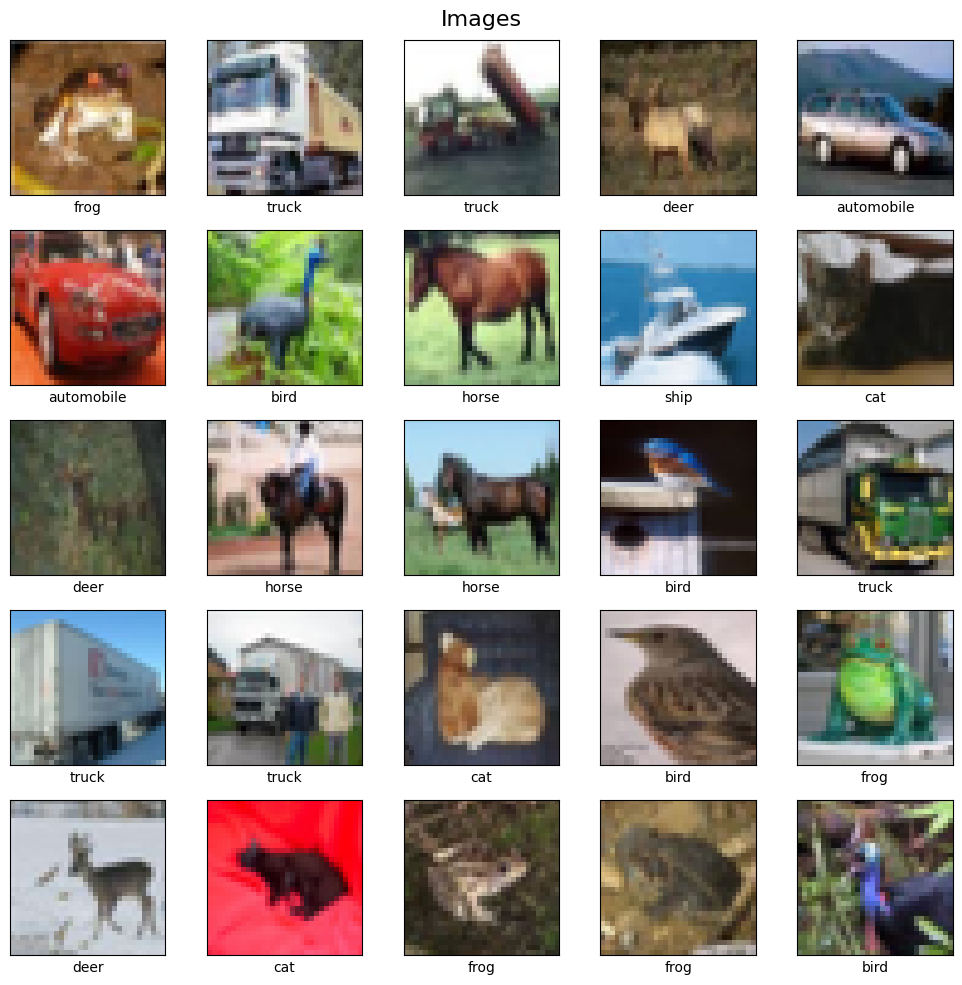

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("Images", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# create model
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [18]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3613 - loss: 1.7260 - val_accuracy: 0.5724 - val_loss: 1.1965
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5880 - loss: 1.1554 - val_accuracy: 0.6302 - val_loss: 1.0537
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6534 - loss: 0.9828 - val_accuracy: 0.6539 - val_loss: 1.0033
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.6890 - loss: 0.8934 - val_accuracy: 0.6806 - val_loss: 0.9238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7133 - loss: 0.8129 - val_accuracy: 0.7026 - val_loss: 0.8740
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7422 - loss: 0.7380 - val_accuracy: 0.7047 - val_loss: 0.8778
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7620 - loss: 0.6735 - val_accuracy: 0.7005 - val_loss: 0.8866
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7753 -

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7149 - loss: 0.8950

Test Accuracy: 0.71


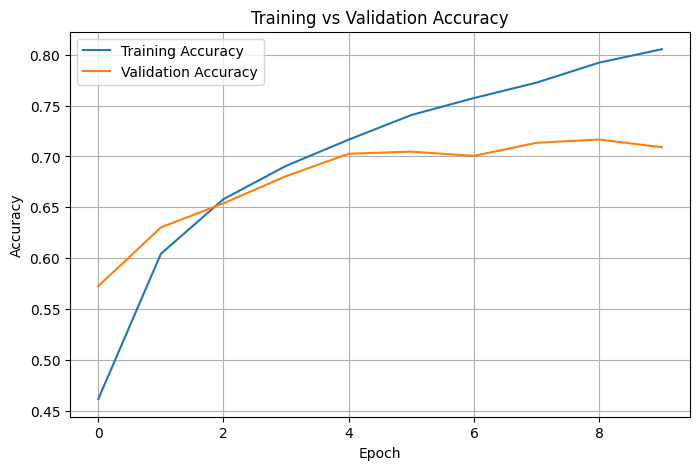

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


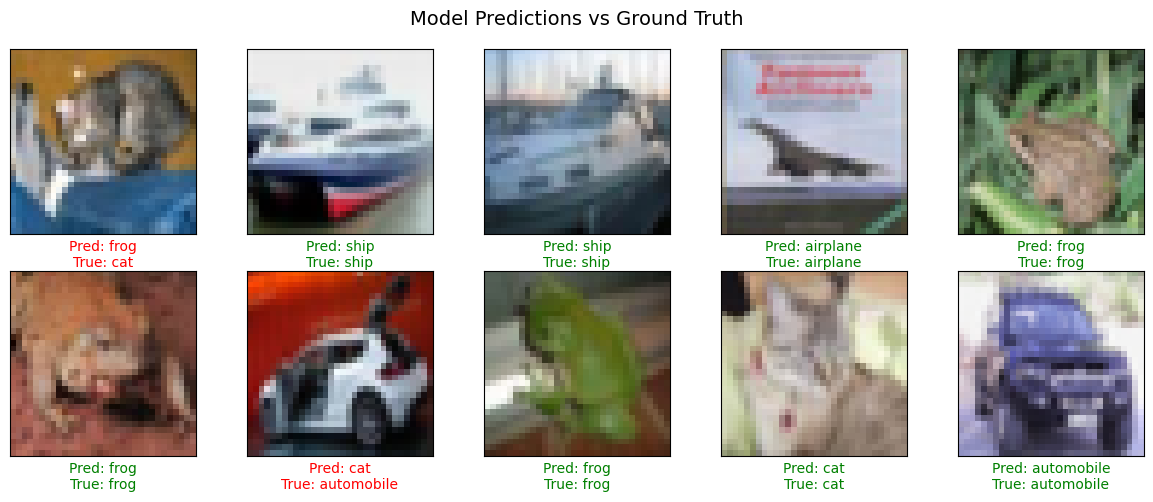

In [25]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i][0]
    color = 'green' if pred_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}", color=color)
plt.suptitle("Model Predictions vs Ground Truth", fontsize=14)
plt.tight_layout()
plt.show()